### Name : Danial Gharib
### StudentId : 400105155

# Librarires

In [20]:
import numpy as np
import random
from tqdm import tqdm
from sklearn.datasets import fetch_california_housing

# Load Dataset

In [21]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [28]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def fit(self, X):
        # np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]
        for _ in range(self.max_iter):
            clusters = self._assign_clusters(X)
            new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.n_clusters)])
            # if np.allclose(self.centroids, new_centroids):
            #     break
            if np.array_equal(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.array([[np.linalg.norm(x - centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)
    
    def predict(self, X):
        return self._assign_clusters(X)
    
    def inertia(self, X):
        clusters = self._assign_clusters(X)
        return np.sum([np.linalg.norm(X[clusters == k] - self.centroids[k])**2 for k in range(self.n_clusters)])

# Use elbow method and silhouette method to choose optimal cluster numbers

Finding Inertia Values for Elbow method: 100%|██████████| 9/9 [00:50<00:00,  5.59s/it]


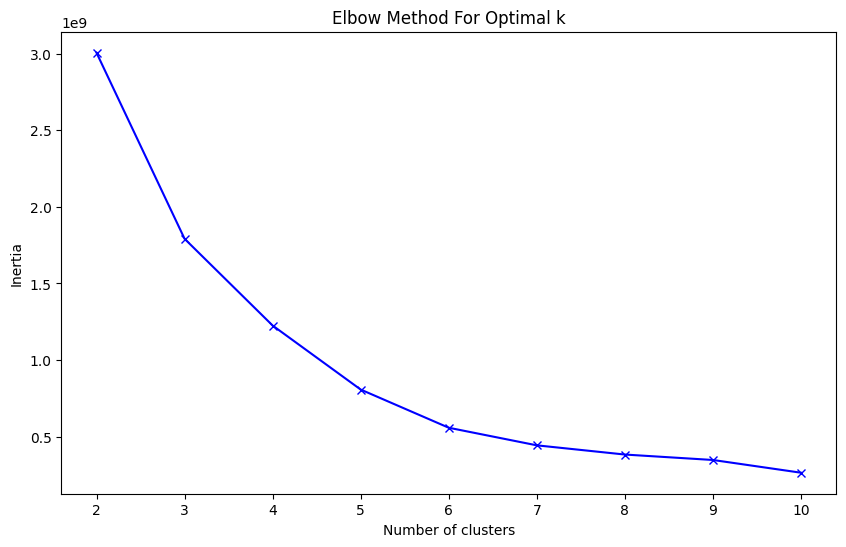

In [29]:
#TODO
import matplotlib.pyplot as plt

inertia_values = []
K = range(2, 11)

for k in tqdm(K, desc="Finding Inertia Values for Elbow method"):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(x_data)
    inertia_values.append(kmeans.inertia(x_data))

plt.figure(figsize=(10, 6))
plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


Calculating silhouette scores for different k values: 100%|██████████| 9/9 [00:54<00:00,  6.10s/it]


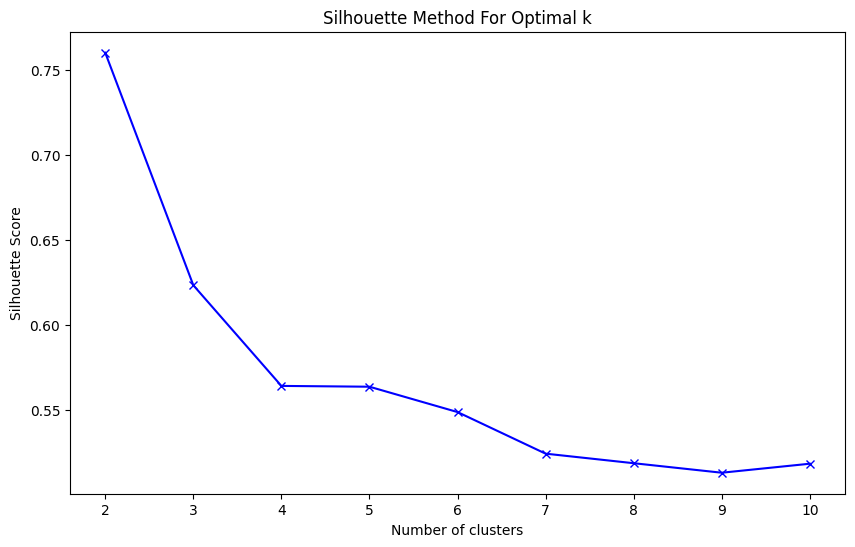

In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in tqdm(K, desc="Calculating silhouette scores for different k values"):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(x_data)
    cluster_labels = kmeans.predict(x_data)
    silhouette_scores.append(silhouette_score(x_data, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

calculating inertia for different K values: 100%|██████████| 10/10 [00:53<00:00,  5.34s/it]


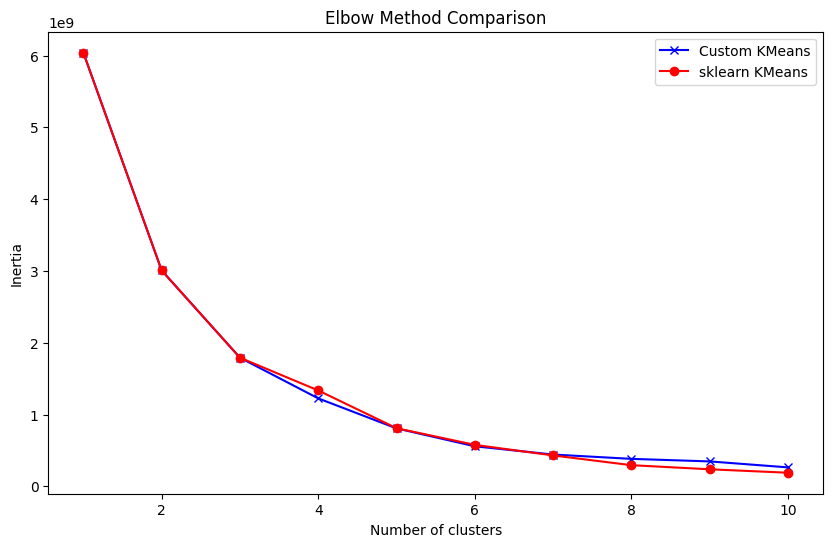

In [31]:
#TODO
from sklearn.cluster import KMeans as SKLearnKMeans

custom_inertia_values = []
sklearn_inertia_values = []
K = range(1, 11)

for k in tqdm(K, desc="calculating inertia for different K values"):
    custom_kmeans = KMeans(n_clusters=k, max_iter=1000)
    custom_kmeans.fit(x_data)
    custom_inertia_values.append(custom_kmeans.inertia(x_data))

    sklearn_kmeans = SKLearnKMeans(n_clusters=k, max_iter=1000)
    sklearn_kmeans.fit(x_data)
    sklearn_inertia_values.append(sklearn_kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, custom_inertia_values, 'bx-', label='Custom KMeans')
plt.plot(K, sklearn_inertia_values, 'ro-', label='sklearn KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method Comparison')
plt.legend()
plt.show()

calculating silhouette score for different k values: 100%|██████████| 9/9 [00:54<00:00,  6.09s/it]


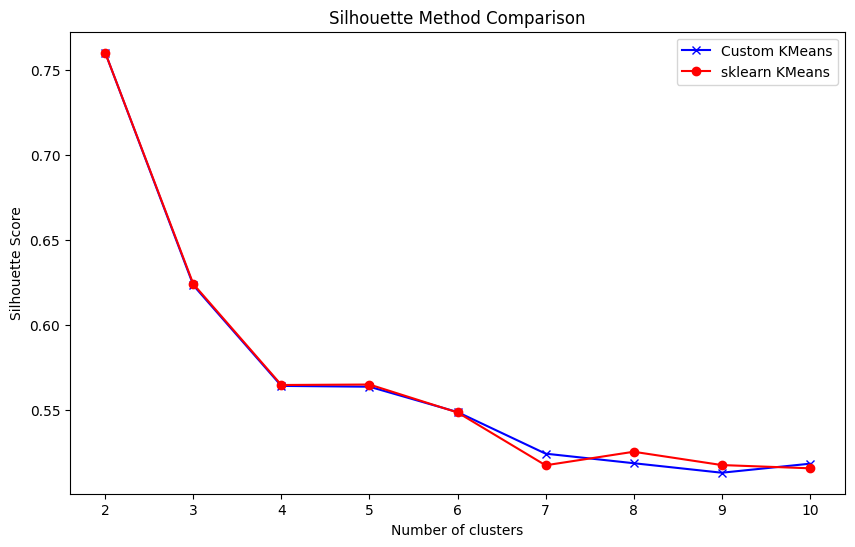

In [32]:
custom_silhouette_scores = []
sklearn_silhouette_scores = []

for k in tqdm(range(2, 11), desc="calculating silhouette score for different k values"):
    custom_kmeans = KMeans(n_clusters=k, max_iter=1000)
    custom_kmeans.fit(x_data)
    custom_cluster_labels = custom_kmeans.predict(x_data)
    custom_silhouette_scores.append(silhouette_score(x_data, custom_cluster_labels))

    sklearn_kmeans = SKLearnKMeans(n_clusters=k, max_iter=1000)
    sklearn_kmeans.fit(x_data)
    sklearn_cluster_labels = sklearn_kmeans.labels_
    sklearn_silhouette_scores.append(silhouette_score(x_data, sklearn_cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), custom_silhouette_scores, 'bx-', label='Custom KMeans')
plt.plot(range(2, 11), sklearn_silhouette_scores, 'ro-', label='sklearn KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method Comparison')
plt.legend()
plt.show()

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

Ansewr : 

If we consider the Elbow method, when looking at the diagrams and plots we observe that there's a huge difference in inertia value from k=1 to k=2 , and then less than that (but still large) from k=2 to k=3 and k=3 to k=4 (but much less differnce in this step ) but after that the differences in inertia and distortion is not considered that much so (but conside that in some cases including probably this case, detecting the elbow point and an elbow shape in the plot is rather difficult) in this especial case for both our custom kmeans and scikit-learn kmenase we can have an optimal k value for k=2 or k=3


If we consider the silhouette method, we know priorly that in silhouette method the higher score the better cause it measures the level of compactness in each cluster for each data point, and when looking at the plots (for both custom kmeans and sklearn kmenas) we observe that the best silhouette score happens to be at the very beggining or k=2.


note that in here for both methods (custom kmeans and sklearn kmeans) our results were not different but when we see the plots they are a bit different in some points and this goes back to the fact that in sklearn kmeans we could have different policies for initializations of cluster centroird plus we could use different random seed and also repeat the algorithm with different starting points and different seeds and then choose the best ones and that is the cause in difference between sklearn plots and our custom kmenas.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

Both silhouette score and elbow method have their own advantages and disadvantages that we point to:

Elbow methods calculation and plotting is simple and efficient we just need to calculate sum of squared distances between datapoints and their respective centroids, it has also got some intuitive point behind it because we select the optimal k when the ration of decrease in inertia drops. On the other hand some times (a lot of times maybe) it is not that piece of cake to find the elbow place! and we can't detect it that easily, also it may not be powerful enough for datasets which are not circular or non-convex and have especial shapes (like s-shape).


Silhouette score on the other hand provides another good intuitive measure which tries to find the level of compactness and relevance of each datapoint to the cluster that it has been assigned when compared to the other clusters so higher scores indicate better clustering, So we can say it provides a more statistical and powerful measurment, and perhaps works well with more sophisticated and arbitrary shapes rather than simple circular cluster points, On the other hand one of disadvantages is that it can be more costly and time consuming when compared to the elbow method.

Overall I prefer silhouette method because in Elbow method detection of elbow point is difficult plus it can't be a good representative of how well a cluster is for arbitrary shapes, on the other hand silhouette score is a more statistical method and can capture such arbitrary shapes, also we can use it when a quantitative measure of how well compact our cluster are, is needed.
